In [1]:
import numpy as np
import sys
import gym
import random
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [2]:
sys.path.append('../../')
from RLFramework.Agents import *

In [3]:
def frozen_lake_train(n_episodes, n_timesteps=int(1e10),
                      discount_rate = 0.99, lr = 0.1,
                      max_exploration_rate = 1, exploration_decay_rate = 0.001, min_exploration_rate = 0.001,
                      desc=None, map_name="4x4", is_slippery=True):
    
    #create environment frozen lake
    env = gym.make("FrozenLake-v1", desc=desc, map_name=map_name, is_slippery=is_slippery, render_mode="rgb_array_list")
    
    n_states = env.observation_space.n
    n_actions = env.action_space.n
    
    #create agent
    agent = Q_agent(n_states=n_states, n_actions=n_actions,
                    discount_rate=discount_rate, lr=lr,
                    max_exploration_rate=max_exploration_rate, exploration_decay_rate=exploration_decay_rate,
                    min_exploration_rate=min_exploration_rate)
    reward=None
    
    
    reward_list = agent.train(env, n_episodes=n_episodes, max_timesteps=n_timesteps,
                              checkpoint_path=None, warm_start_weights=None, verbatim=1, render_every=None)
    
    #print(np.cumsum(reward_list)/(np.arange(n_episodes) + 1))
    plt.figure(figsize=(14,10))
    plt.plot((np.arange(n_episodes) + 1), np.cumsum(reward_list)/(np.arange(n_episodes) + 1))
    plt.show()
    env.close()
    return (reward_list, agent, env)

In [4]:
def frozen_lake_play(env, agent, n_episodes, n_timesteps=int(1e10),
                      desc=None, map_name="4x4", is_slippery=True, render_mode="human"):
    
    #create environment frozen lake
    env = gym.make("FrozenLake-v1", desc=desc, map_name=map_name, is_slippery=is_slippery, render_mode=render_mode)
    
    n_states = env.observation_space.n
    n_actions = env.action_space.n
        
    reward_list = agent.play(env, n_episodes=n_episodes, max_timesteps=n_timesteps,
                             verbatim=1, render_every=1)
    
    #print(np.cumsum(reward_list)/(np.arange(n_episodes) + 1))
    env.close()
    return (reward_list, agent, env)

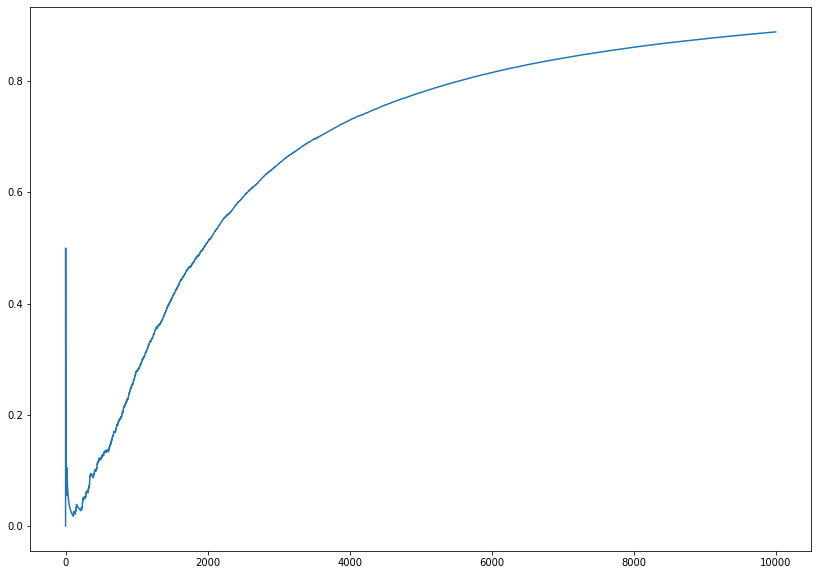

[0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [214]:
desc=None
map_name="4x4"#"4x4""8x8"
is_slippery=False

rewards, agent, env = frozen_lake_train(10000, n_timesteps=int(1e10), discount_rate = 0.99, lr = 0.1,
                                        max_exploration_rate = 1, exploration_decay_rate = 0.001,
                                        min_exploration_rate = 0.001,
                                        desc=desc, map_name=map_name, is_slippery=is_slippery)
rewards

In [6]:
rewards, agent, env = frozen_lake_play(env, agent, 4,
                      desc=desc, map_name=map_name, is_slippery=is_slippery)

In [ ]:
desc2=[
    "SFFHFF",
    "FFFFFH",
    "FFHFFF",
    "HFFFHF",
    "FFHFFF",
    "FFHFFG"]
map_name2=None
is_slippery2=False

rewards2, agent2, env2 = frozen_lake_train(10000, n_timesteps=int(1e10), discount_rate = 0.99, lr = 0.1,
                                           max_exploration_rate = 1, exploration_decay_rate = 0.001,
                                           min_exploration_rate = 0.001,
                                           desc=desc2, map_name=map_name2, is_slippery=is_slippery2)
rewards2

In [ ]:
rewards2, agent2, env2 = frozen_lake_play(env2, agent2, 4,
                      desc=desc2, map_name=map_name2, is_slippery=is_slippery2)